In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import joypy
from scipy.stats import iqr

In [2]:
def extract_prefix(candidate_id):
    if len(str(candidate_id)) == 7:
        return int(str(candidate_id)[:1])  
    elif len(str(candidate_id)) == 8:
        return int(str(candidate_id)[:2]) 
    else:
        return None 

#### Điểm môn thi

In [11]:
df_score_1 = pd.read_csv('vnhsge-2018_score_1.csv')
df_score_2 = pd.read_csv('vnhsge-2018_score_2.csv')
df_province_region = pd.read_csv('vnhsge_province_region.csv')

# Merge score dataframes
df_score = pd.concat([df_score_1, df_score_2]).drop_duplicates()

# Filter and sort score data
df_score = df_score[df_score['score'] > 0]
df_score = df_score.sort_values(by=['is_chosen', 'subject_id'], ascending=False)

# Add province code
df_score['province_code'] = df_score['candidate_id'].apply(extract_prefix)

# Merge with province and region data
merged_df = pd.merge(df_score, df_province_region, on='province_code', how='inner')

# Select relevant columns
merged_df = merged_df[['candidate_id', 'subject_id', 'score', 'is_chosen', 'province_name', 'er_code', 'region']]

# Display the resulting dataframe
merged_df.head()

candidate_id subject_id  score  is_chosen province_name  er_code  \
0       1000019        Van   5.75          1        Hà Nội        1   
1       1000020        Van   8.25          1        Hà Nội        1   
2       1000021        Van   8.00          1        Hà Nội        1   
3       1000022        Van   6.50          1        Hà Nội        1   
4       1000023        Van   6.75          1        Hà Nội        1   

                            region  
0  Thành phố trực thuộc trung ương  
1  Thành phố trực thuộc trung ương  
2  Thành phố trực thuộc trung ương  
3  Thành phố trực thuộc trung ương  
4  Thành phố trực thuộc trung ương

<Figure size 432x288 with 0 Axes>

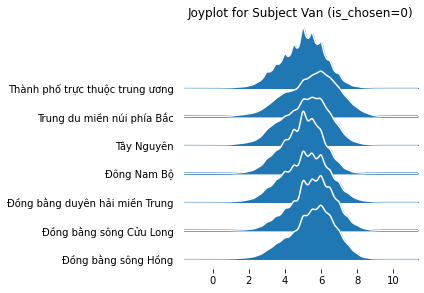

<Figure size 432x288 with 0 Axes>

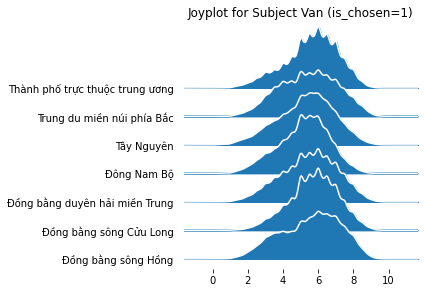

<Figure size 432x288 with 0 Axes>

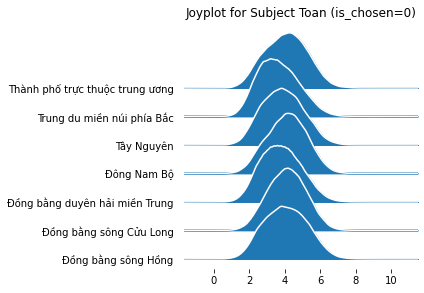

<Figure size 432x288 with 0 Axes>

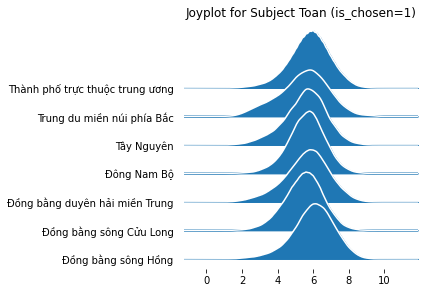

<Figure size 432x288 with 0 Axes>

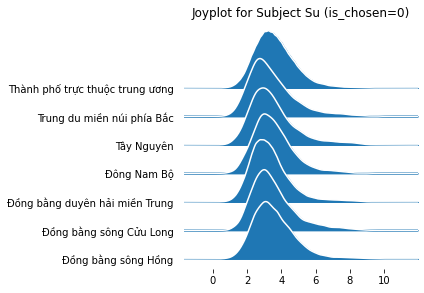

<Figure size 432x288 with 0 Axes>

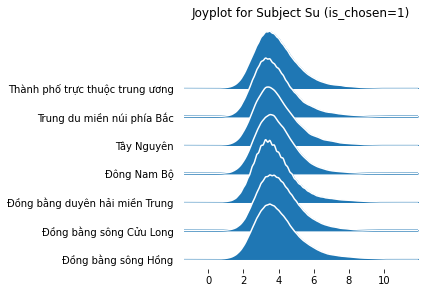

<Figure size 432x288 with 0 Axes>

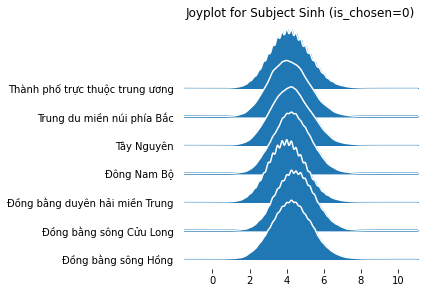

<Figure size 432x288 with 0 Axes>

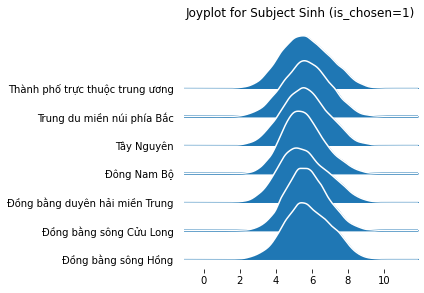

<Figure size 432x288 with 0 Axes>

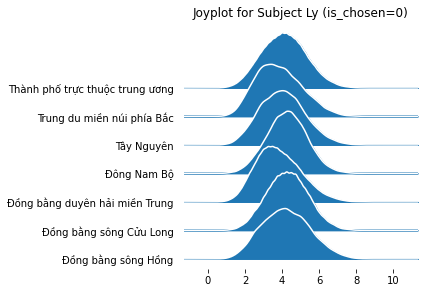

<Figure size 432x288 with 0 Axes>

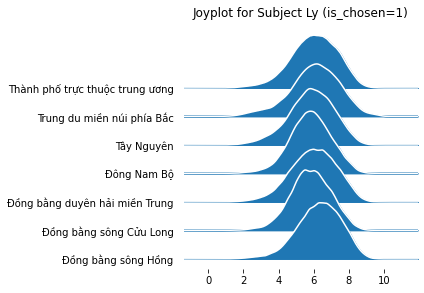

<Figure size 432x288 with 0 Axes>

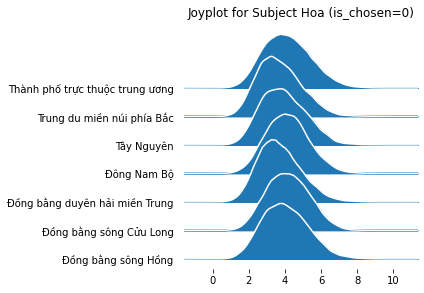

<Figure size 432x288 with 0 Axes>

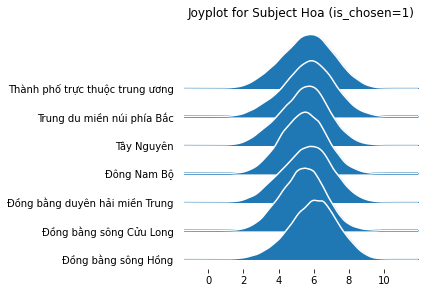

<Figure size 432x288 with 0 Axes>

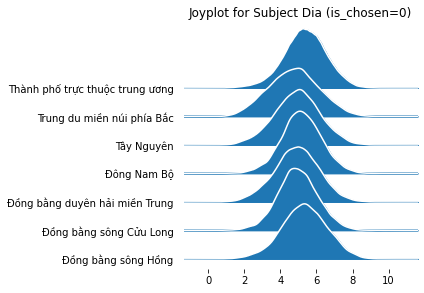

<Figure size 432x288 with 0 Axes>

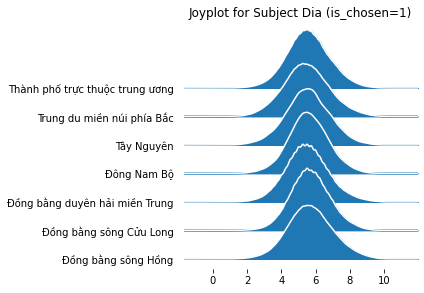

<Figure size 432x288 with 0 Axes>

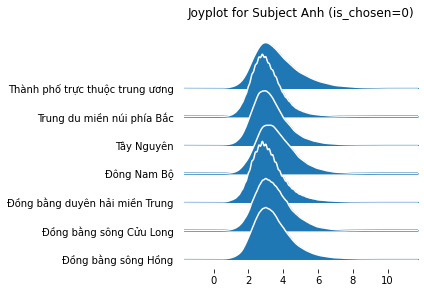

<Figure size 432x288 with 0 Axes>

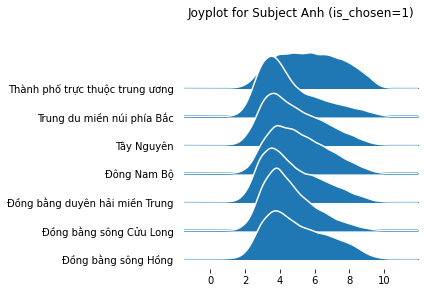

<Figure size 432x288 with 0 Axes>

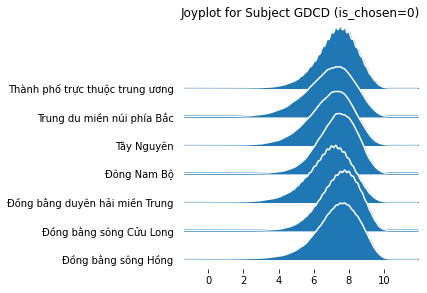

In [21]:
for i in merged_df.subject_id.unique().tolist():
    for j in [0,1]:
        if i == 'GDCD' and j == 1:
            continue      
        filtered_df = merged_df[(merged_df.subject_id == i) & (merged_df.is_chosen == j)]
        plt.figure()
        fig, ax = joypy.joyplot(filtered_df, by = "region", column = "score", linecolor = "white")
        plt.title(f"Joyplot for Subject {i} (is_chosen={j})")
        plt.show()

In [12]:
# Group by 'candidate_id' and concatenate 'subject_id' values as a comma-separated string
d = merged_df.groupby('candidate_id')['subject_id'].apply(lambda x: ','.join(x.astype(str))).reset_index()

# Count the number of 'subject_id' entries per 'candidate_id'
t = merged_df.groupby('candidate_id')['subject_id'].count().reset_index()

# Merge the two DataFrames on 'candidate_id'
sub_inf = pd.merge(d, t, on='candidate_id')

# Rename columns for clarity
sub_inf.columns = ['candidate_id', 'subject_ids', 'subject_count']

# Display the first 5 rows of the resulting DataFrame
sub_inf.head(5)

candidate_id               subject_ids  subject_count
0       1000019  Van,Su,Dia,Toan,GDCD,Anh              6
1       1000020  Van,Toan,Anh,Su,GDCD,Dia              6
2       1000021  Van,Toan,Anh,Su,GDCD,Dia              6
3       1000022  Van,Toan,Anh,Su,GDCD,Dia              6
4       1000023  Van,Toan,Anh,Su,GDCD,Dia              6

In [13]:
# Count total candidates by region and subject_id, excluding 'GDCD'
total_candidates = merged_df.groupby(['region', 'subject_id'])['candidate_id'].count().reset_index()
total_candidates.rename(columns={'candidate_id': 'total_candidates'}, inplace=True)
total_candidates = total_candidates[total_candidates['subject_id'] != 'GDCD']

# Count subjects by region where is_chosen equals 1
subject_count_by_region_chosen = merged_df[merged_df['is_chosen'] == 1].groupby(['er_code', 'region', 'subject_id'])['candidate_id'].count().reset_index()
subject_count_by_region_chosen.rename(columns={'candidate_id': 'total_candidates_chosen'}, inplace=True)

# Merge the two DataFrames on 'region' and 'subject_id'
df = pd.merge(total_candidates, subject_count_by_region_chosen, on=['region', 'subject_id'])

# Calculate the percentage of chosen candidates
df['percentage'] = round((df['total_candidates_chosen'] / df['total_candidates']) * 100, 2)

# Display the first 5 rows of the resulting DataFrame
df.head(5)

region subject_id  total_candidates  er_code  \
0  Thành phố trực thuộc trung ương        Anh            176221        1   
1  Thành phố trực thuộc trung ương        Dia            104026        1   
2  Thành phố trực thuộc trung ương        Hoa            101398        1   
3  Thành phố trực thuộc trung ương         Ly             99230        1   
4  Thành phố trực thuộc trung ương       Sinh             99448        1   

   total_candidates_chosen  percentage  
0                    85233       48.37  
1                    64035       61.56  
2                    49272       48.59  
3                    49766       50.15  
4                    20186       20.30

In [8]:
import plotly.express as px
import pandas as pd
fig = px.line_polar(df, r = 'percentage', theta = 'subject_id', line_close = True, color   = 'region')
#plt.savefig("new12.png",dpi=400) 
fig.show()

C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])
C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])
C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])
C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data

<Figure size 432x288 with 0 Axes>

In [29]:
outliers = {}

In [28]:


subject_name = 'Toan'
outliers = {}

for er_code in range(1, 8):  # Regions 1 to 7
    # Filter data for the specific subject, region, and is_chosen == 0
    data = merged_df[(merged_df.subject_id == subject_name) & 
                     (merged_df.is_chosen == 0) & 
                     (merged_df.er_code == er_code)]['score']
    
    # Calculate Q3, IQR, and upper fence
    Q3 = np.percentile(data, 75)
    IQR = iqr(data)
    upper_fence = round(Q3 + 1.5 * IQR, 2)
    
    # Filter data for scores above the upper fence
    df = merged_df[(merged_df.subject_id == subject_name) & 
                   (merged_df.is_chosen == 0) & 
                   (merged_df.er_code == er_code) & 
                   (merged_df.score >= upper_fence)]
    
    # Iterate over unique province names in the filtered data
    for province in df.province_name.unique().tolist():
        df_tmp = merged_df[(merged_df.subject_id == subject_name) & 
                           (merged_df.is_chosen == 0) & 
                           (merged_df.province_name == province) & 
                           (merged_df.score >= upper_fence)]
        
        # Check the subject count for each candidate
        for candidate_id in df_tmp['candidate_id']:
            subject_count = int(sub_inf[sub_inf.candidate_id == candidate_id]['subject_count'].to_string(index=False, header=False))
            if subject_count < 6:
                subject_ids = sub_inf[sub_inf.candidate_id == candidate_id]['subject_ids'].to_string(index=False, header=False)
                score = merged_df[(merged_df.candidate_id == candidate_id) & 
                                  (merged_df.subject_id == subject_name)]['score'].to_string(index=False, header=False)
                outliers[subject_name] = [subject_ids, score]

# Display the outliers dictionary
print(outliers)

### Điểm khối thi

In [152]:
df_block_score = pd.read_csv('vnhsge-2018_block_score.csv')

# Extract province code from candidate_id
df_block_score['province_code'] = df_block_score['candidate_id'].apply(extract_prefix)

# Merge with province and region data
merged_df_block = pd.merge(df_block_score, df_pe, on='province_code', how='inner')

# Select relevant columns
merged_df_block = merged_df_block[['candidate_id', 'block_id', 'score', 'province_name', 'er_code', 'region']]

merged_df_block.head(5)

candidate_id block_id  score province_name  er_code  \
0            1000019      C00  16.75        Hà Nội        1   
1            1000020      D01  22.05        Hà Nội        1   
2            1000021      D01  20.00        Hà Nội        1   
3            1000022      D01  21.90        Hà Nội        1   
4            1000023      D01  19.35        Hà Nội        1   
...              ...      ...    ...           ...      ...   
921980      64006213      D01  20.55     Hậu Giang        7   
921981      64006214      A00  18.45     Hậu Giang        7   
921982      64006214      B00  18.45     Hậu Giang        7   
921983      64006215      A00  19.80     Hậu Giang        7   
921984      64006216      D01  20.15     Hậu Giang        7   

                                 region  
0       Thành phố trực thuộc trung ương  
1       Thành phố trực thuộc trung ương  
2       Thành phố trực thuộc trung ương  
3       Thành phố trực thuộc trung ương  
4       Thành phố trực thuộc trung ương  
...                                 ...  
921980          Đồng bằng sông Cửu Long  
921981          Đồng bằng sông Cửu Long  
921982          Đồng bằng sông Cửu Long  
921983          Đồng bằng sông Cửu Long  
921984          Đồng bằng sông Cửu Long  

[921985 rows x 6 columns]

In [166]:
block_count_by_region = merged_df_block.groupby(['er_code','region','block_id'])['candidate_id'].count().reset_index()
tmp = block_count_by_region.groupby('block_id')['candidate_id'].sum().reset_index()
block_count_by_region = pd.merge(block_count_by_region,tmp,on='block_id')
block_count_by_region['percentage'] = round(block_count_by_region['candidate_id_x']/block_count_by_region['candidate_id_y']*100,2)
block_count_by_region

er_code                           region block_id  candidate_id_x  \
0         1  Thành phố trực thuộc trung ương      A00           30679   
1         2              Đồng bằng sông Hồng      A00           23401   
2         3       Trung du miền núi phía Bắc      A00            8203   
3         4   Đồng bằng duyên hải miền Trung      A00           31185   
4         5                       Tây Nguyên      A00            9048   
5         6                      Đông Nam Bộ      A00           13363   
6         7          Đồng bằng sông Cửu Long      A00           18048   
7         1  Thành phố trực thuộc trung ương      A01           19306   
8         2              Đồng bằng sông Hồng      A01            5256   
9         3       Trung du miền núi phía Bắc      A01            1819   
10        4   Đồng bằng duyên hải miền Trung      A01            7955   
11        5                       Tây Nguyên      A01            2741   
12        6                      Đông Nam Bộ      A01            5184   
13        7          Đồng bằng sông Cửu Long      A01            4313   
14        1  Thành phố trực thuộc trung ương      B00           20186   
15        2              Đồng bằng sông Hồng      B00           10680   
16        3       Trung du miền núi phía Bắc      B00            6100   
17        4   Đồng bằng duyên hải miền Trung      B00           18183   
18        5                       Tây Nguyên      B00            7118   
19        6                      Đông Nam Bộ      B00            7885   
20        7          Đồng bằng sông Cửu Long      B00           17242   
21        1  Thành phố trực thuộc trung ương      C00           64035   
22        2              Đồng bằng sông Hồng      C00           65176   
23        3       Trung du miền núi phía Bắc      C00           81227   
24        4   Đồng bằng duyên hải miền Trung      C00          100291   
25        5                       Tây Nguyên      C00           28046   
26        6                      Đông Nam Bộ      C00           26359   
27        7          Đồng bằng sông Cửu Long      C00           58032   
28        1  Thành phố trực thuộc trung ương      D01           67996   
29        2              Đồng bằng sông Hồng      D01           30600   
30        3       Trung du miền núi phía Bắc      D01           19295   
31        4   Đồng bằng duyên hải miền Trung      D01           45100   
32        5                       Tây Nguyên      D01           13444   
33        6                      Đông Nam Bộ      D01           18698   
34        7          Đồng bằng sông Cửu Long      D01           35791   

    candidate_id_y  percentage  
0           133927       22.91  
1           133927       17.47  
2           133927        6.12  
3           133927       23.29  
4           133927        6.76  
5           133927        9.98  
6           133927       13.48  
7            46574       41.45  
8            46574       11.29  
9            46574        3.91  
10           46574       17.08  
11           46574        5.89  
12           46574       11.13  
13           46574        9.26  
14           87394       23.10  
15           87394       12.22  
16           87394        6.98  
17           87394       20.81  
18           87394        8.14  
19           87394        9.02  
20           87394       19.73  
21          423166       15.13  
22          423166       15.40  
23          423166       19.20  
24          423166       23.70  
25          423166        6.63  
26          423166        6.23  
27          423166       13.71  
28          230924       29.45  
29          230924       13.25  
30          230924        8.36  
31          230924       19.53  
32          230924        5.82  
33          230924        8.10  
34          230924       15.50

In [167]:
import plotly.express as px
import pandas as pd

           
fig = px.line_polar(block_count_by_region, r = 'percentage', theta = 'block_id', line_close = True, color   = 'region')
#fig.update_traces(fill = 'toself')
plt.savefig("new12.png",dpi=400) 
fig.show()

C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version

<Figure size 432x288 with 0 Axes>

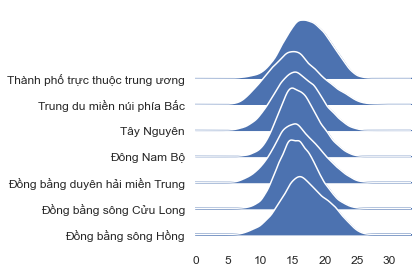

In [192]:
import matplotlib.pyplot as plt
import pandas as pd
import joypy

fig, ax = joypy.joyplot(merged_df_block[merged_df_block.block_id == 'D01'], by = "region", column = "score", linecolor = "white")
plt.savefig("new25.png",dpi=400) 
# plt.show()

In [5]:
df_0 = pd.read_csv('vnhsge-2018_zero.csv')
df_0['avg_score'] = df_0['avg_score'].fillna(0)
#df_0

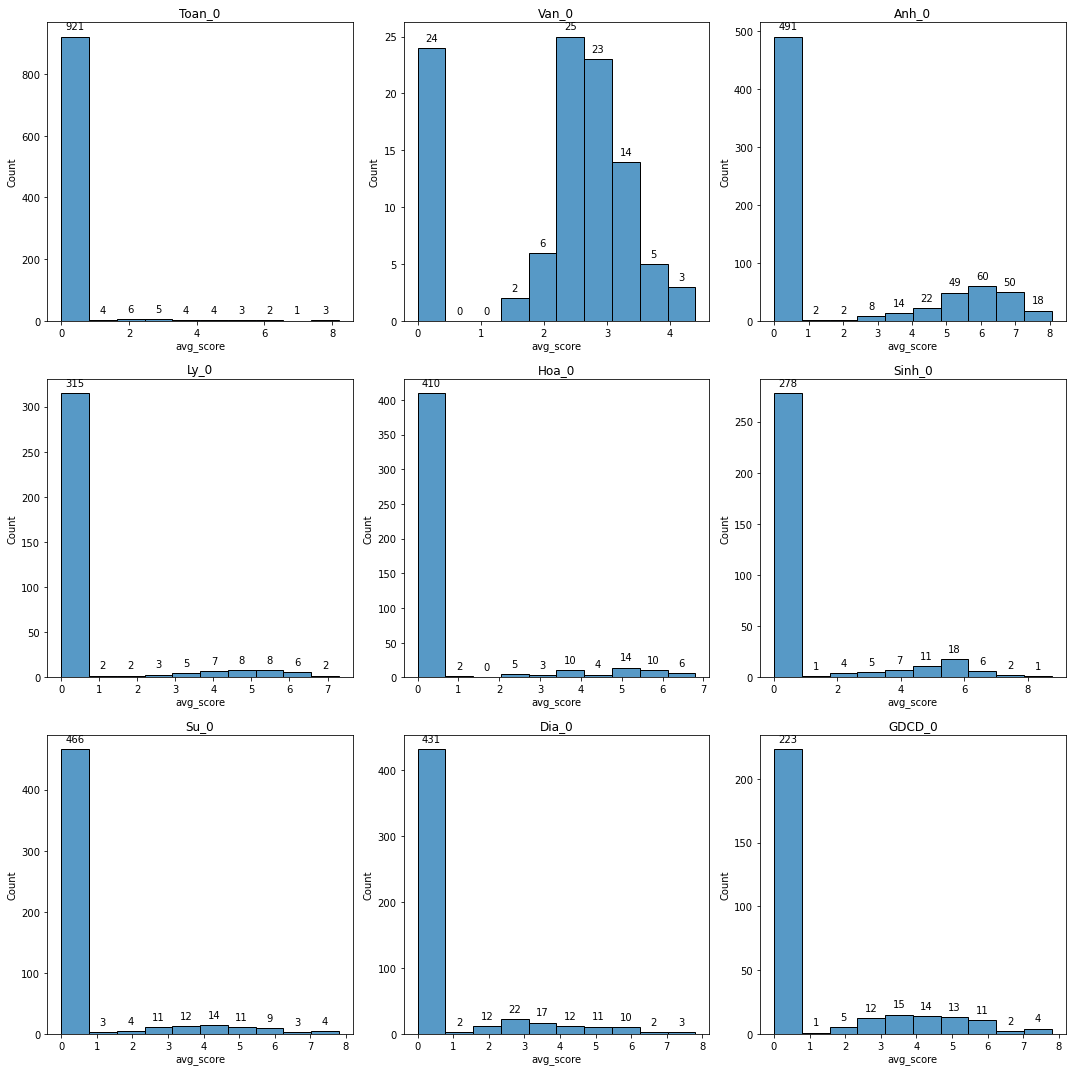

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# List of subject IDs
subjects = ["Toan_0", "Van_0", "Anh_0", "Ly_0", "Hoa_0", "Sinh_0", "Su_0", "Dia_0", "GDCD_0"]

# Iterate over each subject ID and plot the corresponding histogram
for i, subject in enumerate(subjects):
    ax = sns.histplot(data=df_0[df_0[subject] == 1], x="avg_score", ax=axes[i], bins=10)
    axes[i].set_title(subject)
    # Đặt nhãn số cho từng cột của biểu đồ
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 10), 
                       textcoords = 'offset points')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("c10.png",dpi=400) 
# Show plot
plt.show()

### Biểu đồ 2. Mối quan hệ giữa điểm trung bình và chênh lệch điểm của nhóm thí sinh THPT

In [9]:
df_grad = pd.read_csv('vnhsge-2018_avg.csv')
df_grad

candidate_id  avg_score subject_group  count_5  avg_score_1  \
0            1000019       5.60          KHXH        4         5.58   
1            1000020       7.35          KHXH        6         7.35   
2            1000021       6.67          KHXH        5         6.67   
3            1000022       7.30          KHXH        5         7.30   
4            1000023       6.45          KHXH        4         6.45   
...              ...        ...           ...      ...          ...   
805491      64006212       6.22          KHXH        5         6.25   
805492      64006213       6.85          KHTN        4         6.85   
805493      64006214       6.08          KHTN        5         6.11   
805494      64006215       5.50          KHTN        4         6.60   
805495      64006216       6.72          KHXH        4         6.72   

        count_score_1  avg_score_0  count_score_0  score_range  
0                   3         5.62              3         2.45  
1                   3         6.58              3         2.50  
2                   3         6.08              3         4.25  
3                   3         6.92              3         4.65  
4                   3         5.75              3         3.80  
...               ...          ...            ...          ...  
805491              3         6.05              3         4.75  
805492              3         4.42              3         5.00  
805493              4         6.02              2         4.45  
805494              3         4.40              3         4.80  
805495              3         5.67              3         4.25  

[805496 rows x 9 columns]

In [10]:
def round_to_nearest_half(x):
    return np.round(x * 2) / 2

In [11]:
df_tmp = df_grad.copy()
df_tmp['score_range'] = df_tmp['score_range'].apply(round_to_nearest_half)
df_tmp['avg_score'] = df_tmp['avg_score'].apply(round_to_nearest_half)

<Figure size 576x432 with 0 Axes>

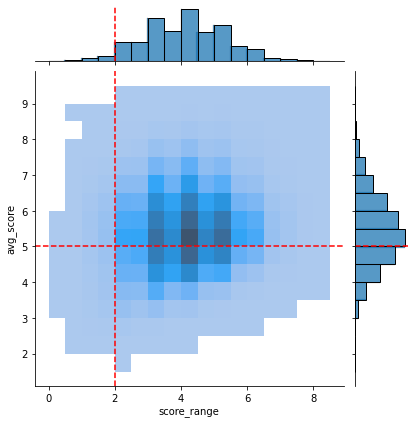

In [12]:
# Create JointGrid
plt.figure(figsize=(8, 6))
g =  sns.jointplot(data=df_tmp, x="score_range", y="avg_score", kind="hist",binwidth=0.5)
g.plot_marginals(sns.histplot,binwidth=0.5)
# Scatter plo
# Additional formatting
g.refline(x=2, y=5,color='red')
plt.savefig("c13.png",dpi=400) 
plt.show()

### Biểu đồ 3,4. Phân phối điểm thi theo 2 nhóm môn

### Biểu đồ 6. Tổng và phần trăm tích lũy theo điểm trung bình

In [14]:
data = []
i = 0
while i <= 10:
    x = len(df_grad[df_grad['avg_score'] >= i])
    y = len(df_grad)
    percent = round(x/y,3)*100
    data.append((i, x, percent))
    #print(i,":",x,"/",y,"(",percent,")")
    i += 0.25
new_df = pd.DataFrame(data, columns=['score', 'count', 'percent'])
#new_df

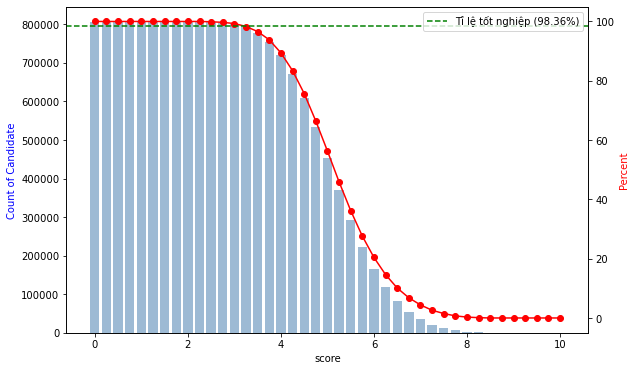

In [15]:
fig, ax1 = plt.subplots(figsize=(10, 6))
# Create bar plot on primary axis
ax1.bar(new_df['score'], new_df['count'], width = 0.2,color='#0b5394', alpha=0.4)
ax1.set_xlabel('score')
ax1.set_ylabel('Count of Candidate', color='blue')

# Create a secondary axis for the line plot
ax2 = ax1.twinx()
ax2.plot(new_df['score'], new_df['percent'], color='red', marker='o')
ax2.set_ylabel('Percent', color='red')

# Add grid for both axes
ax1.grid(False)
ax2.grid(False)
fig.subplots_adjust(right=0.85)

ax2.axhline(y=98.36, color='green', linestyle='--', label='Tỉ lệ tốt nghiệp (98.36%)')
ax2.legend(loc='upper right')
# Add title
plt.savefig("c14.png",dpi=300) 
plt.show()

### Biểu đồ 7. Biểu đồ boxplot so sánh điểm khối thi lớn nhất và điểm môn thi thấp nhất

### Phổ điểm môn thi & khối thi

In [20]:
df_tmp_1 = pd.read_csv('vnhsge-2018_score_1.csv')
df_tmp_2 = pd.read_csv('vnhsge-2018_score_2.csv')
df_score = pd.merge(df_tmp_1, df_tmp_2, how='outer')
df_score = df_score.drop_duplicates()
df_score = df_score.sort_values(by=['is_chosen','subject_id'],ascending=False)
df_score = df_score[df_score['score'] > 0]
df_score

candidate_id subject_id  score  is_chosen
5             1000019        Van   5.75          1
11            1000020        Van   8.25          1
17            1000021        Van   8.00          1
23            1000022        Van   6.50          1
29            1000023        Van   6.75          1
...               ...        ...    ...        ...
5391039      64006209        Anh   2.80          0
5391045      64006210        Anh   3.00          0
5391057      64006212        Anh   5.00          0
5391069      64006214        Anh   3.80          0
5391075      64006215        Anh   2.20          0

[5386802 rows x 4 columns]

In [22]:
df_block_score = pd.read_csv('vnhsge-2018_block_score.csv')
df_block_score

candidate_id block_id  score
0            1000019      C00  16.75
1            1000020      D01  22.05
2            1000021      D01  20.00
3            1000022      D01  21.90
4            1000023      D01  19.35
...              ...      ...    ...
921980      64006213      D01  20.55
921981      64006214      A00  18.45
921982      64006214      B00  18.45
921983      64006215      A00  19.80
921984      64006216      D01  20.15

[921985 rows x 3 columns]

In [10]:
for i in df_score['subject_id'].unique():
    if i != 'GDCD':
        df = df_score[(df_score['subject_id'] == i) & (df_score['is_chosen'] == 1)]
        num_rows = len(df)
        mean = round(np.mean(df['score']),2)
        std_dev = round(np.std(df['score']),2)
        percent_below_5 = round(len(df[df['score'] < 5]) / len(df) * 100,2)
        print(i,num_rows,mean,std_dev,percent_below_5)

Van 651145 5.53 1.55 31.24
Toan 483116 5.7 1.18 23.15
Su 423166 3.89 1.23 81.58
Sinh 87394 5.64 1.24 27.94
Ly 179753 6.0 1.26 18.1
Hoa 213524 5.61 1.37 29.3
Dia 423166 5.57 1.25 28.79
Anh 272236 5.06 1.77 52.4


In [9]:
for i in df_score['subject_id'].unique():
    df = df_score[(df_score['subject_id'] == i) & (df_score['is_chosen'] == 0)]
    num_rows = len(df)
    mean = round(np.mean(df['score']),2)
    std_dev = round(np.std(df['score']),2)
    percent_below_5 = round(len(df[df['score'] < 5]) / len(df) * 100,2)
    print(i,num_rows,mean,std_dev,percent_below_5)

Van 250481 5.25 1.24 35.09
Toan 433399 3.92 1.15 79.15
Su 142076 3.5 1.22 88.15
Sinh 295904 4.22 1.04 73.76
Ly 206978 4.08 1.18 74.57
Hoa 175752 4.0 1.23 76.24
Dia 125642 5.13 1.22 41.03
Anh 543966 3.34 1.08 91.39
GDCD 479104 7.13 1.24 4.88


In [8]:
for i in df_block_score['block_id'].unique():
    df = df_block_score[df_block_score['block_id'] == i]
    num_rows = len(df)
    mean = round(np.mean(df['score']),2)
    std_dev = round(np.std(df['score']),2)
    print(i,num_rows,mean,std_dev)

C00 423166 14.67 3.31
D01 230924 16.34 3.4
B00 87394 16.65 3.42
A01 46574 18.5 3.6
A00 133927 17.82 3.19
